## Customer Segmentation with Unsupervised Learning - Known Customers

In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')


Bad key "backend.qt4" on line 43 in
/etc/matplotlib/matplotlibrc.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder, Binarizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [3]:
!pip3 install imblearn
from imblearn.over_sampling import ADASYN, SMOTE

You should consider upgrading via the 'pip install --upgrade pip' command.


In [4]:
df = pd.read_csv('data/df.csv')

### So far we put all customers in one bucket... 

### But customers behave and spend differently...

In [5]:
df

,name,street_address,city,postcode,phone_number,job,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion,score
0,Shane Davis,650 Reyes Square,New Brad,9930,486.414.3551x5061,Financial trader,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0,0.678715
1,Thomas Fuentes,15482 Anderson Square,Lake Linda,59437,489-096-2389x743,Chiropractor,6,329.08,1,1,Rural,1,Web,No Offer,0,0.961538
2,Sarah Tucker,0709 Maria Drive,New Melissaside,63241,(832)022-5573x275,"Programmer, multimedia",7,180.65,0,1,Surburban,1,Web,Buy One Get One,0,0.205998
3,Greg Nguyen,330 Jason Square,Kendraville,73418,557-122-4652x76680,Youth worker,9,675.83,1,0,Rural,1,Web,Discount,0,1.216920
4,Mrs. Amy Gray,1384 Hall Manor Suite 170,Stevensland,51007,001-623-997-5852x71616,Land/geomatics surveyor,2,45.34,1,0,Urban,0,Web,Buy One Get One,0,1.389221
5,Lori Gonzalez,441 Gerald Parkway Apt. 505,Matthewside,26152,(288)358-6661x8814,Osteopath,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,1,2.296638
6,Diana Craig,83756 Jennings Oval Apt. 245,East Jackie,36489,277-936-0732x002,Corporate investment banker,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,0,0.597264
7,Carol Gonzalez,1919 Moore Burgs,Meganport,75437,4838635830,Chemical engineer,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0,1.130879
8,Elaine Lee,35986 James Lodge Suite 027,New Tracy,18762,001-684-970-2298x0561,Radio producer,9,675.07,1,1,Rural,1,Phone,Discount,0,1.322631
9,Angela Jenkins,5429 Alyssa Mission,Amyshire,92546,7308224257,Physiological scientist,10,32.84,0,1,Urban,1,Web,Buy One Get One,0,0.573637


### Manual Segmentation 

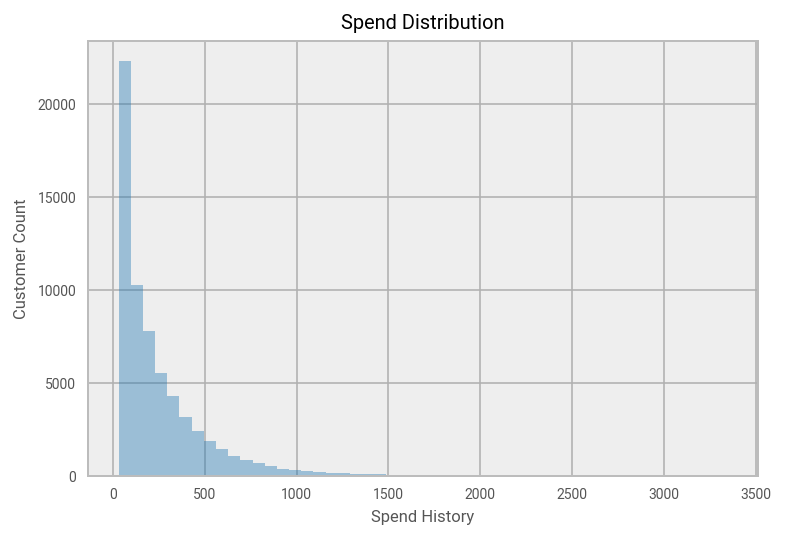

In [6]:
ax = sns.distplot(df.history, kde=False)
ax.set(title='Spend Distribution', xlabel='Spend History', ylabel='Customer Count')
plt.show()

#### Manual Segmentation with Buckets

In [7]:
pd.cut(df['history'], 3, retbins=True)

(0        (26.674, 1135.303]
 1        (26.674, 1135.303]
 2        (26.674, 1135.303]
 3        (26.674, 1135.303]
 4        (26.674, 1135.303]
 5        (26.674, 1135.303]
 6        (26.674, 1135.303]
 7        (26.674, 1135.303]
 8        (26.674, 1135.303]
 9        (26.674, 1135.303]
 10       (26.674, 1135.303]
 11       (26.674, 1135.303]
 12       (26.674, 1135.303]
 13       (26.674, 1135.303]
 14       (26.674, 1135.303]
 15       (26.674, 1135.303]
 16       (26.674, 1135.303]
 17       (26.674, 1135.303]
 18       (26.674, 1135.303]
 19       (26.674, 1135.303]
 20       (26.674, 1135.303]
 21       (26.674, 1135.303]
 22       (26.674, 1135.303]
 23       (26.674, 1135.303]
 24       (26.674, 1135.303]
 25       (26.674, 1135.303]
 26       (26.674, 1135.303]
 27       (26.674, 1135.303]
 28       (26.674, 1135.303]
 29       (26.674, 1135.303]
                 ...        
 63970    (26.674, 1135.303]
 63971    (26.674, 1135.303]
 63972    (26.674, 1135.303]
 63973    (26.

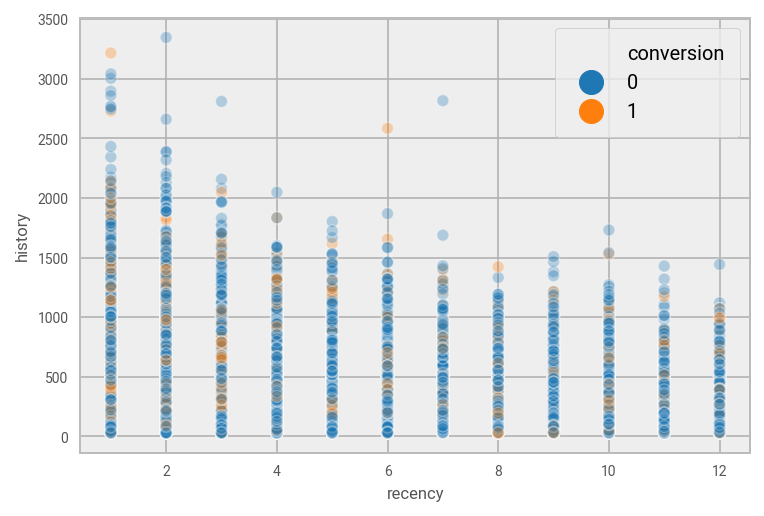

In [8]:
#cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="recency", y="history",
                     hue="conversion", alpha=0.3,
                     sizes=(10, 200),
                     data=df)
plt.show()

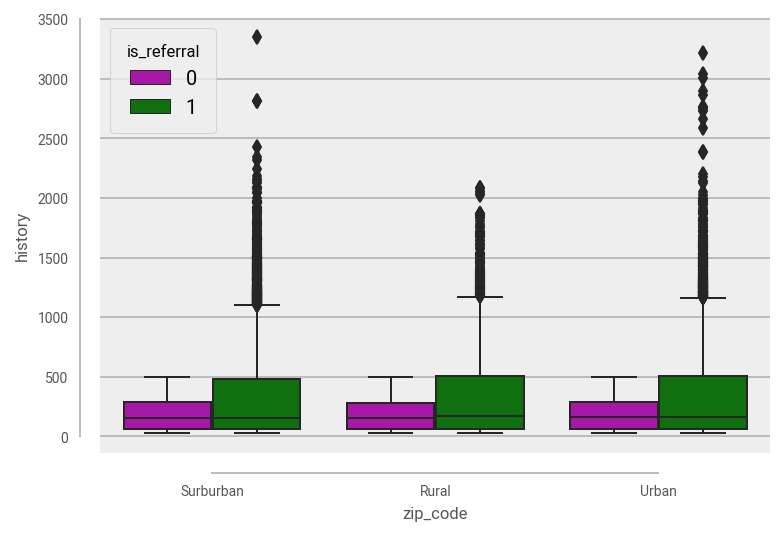

In [9]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="zip_code", y="history",
            hue="is_referral", palette=["m", "g"],
            data=df)
sns.despine(offset=10, trim=True)
plt.show()

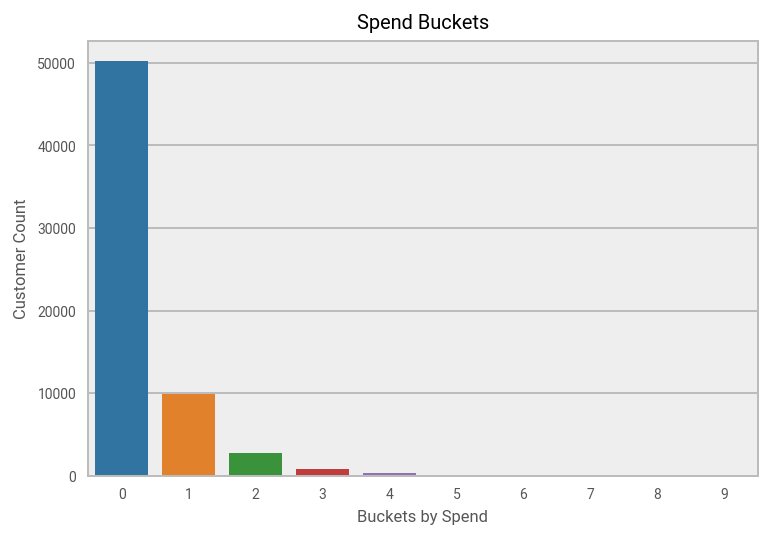

In [10]:
ax = sns.countplot(pd.cut(df['history'], 10, labels=False))
ax.set(title='Spend Buckets', xlabel='Buckets by Spend', ylabel='Customer Count')
plt.show()

### We could now target our customers with different messages based on which bucket they are in... 

### But customer behavior within the above buckets can be radically different

### Machine Learning can help us detect hidden commonalities among customers for better Segmentation

Selecting Features for Unsupervised Learning

In [11]:
df_segm = df[['recency', 'history', 'used_discount', 'used_bogo', 'zip_code', 'is_referral', 'channel', 'offer']]

Creating the Unsupervised Learning Model

In [12]:
def processing_pipeline(numeric_features, categorical_features, classifier):

    #numeric_features and categorical_features must be lists

    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    #binary_transformer = Pipeline(steps=[
    #    ('imputer', SimpleImputer(strategy='most_frequent')),
    #    ('binary', Binarizer(threshold=0.5))])
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    #    ('bin', binary_transformer, bin_features)
    ])
    
    # Append classifier to preprocessing pipeline.
    # Now we have a full prediction pipeline.
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('clf', classifier)])

    return pipe

In [13]:
numeric_features = ['recency', 'history', 'used_discount', 'used_bogo', 'is_referral']
categorical_features = ['zip_code', 'channel', 'offer']

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3, random_state=0)

In [16]:
kmeans_pipeline = processing_pipeline(numeric_features, categorical_features, kmeans)

In [17]:
kmeans = kmeans_pipeline.fit(df_segm)

In [18]:
df_segm['cluster'] = kmeans_pipeline.predict(df_segm)

In [19]:
from yellowbrick.cluster import silhouette_visualizer

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


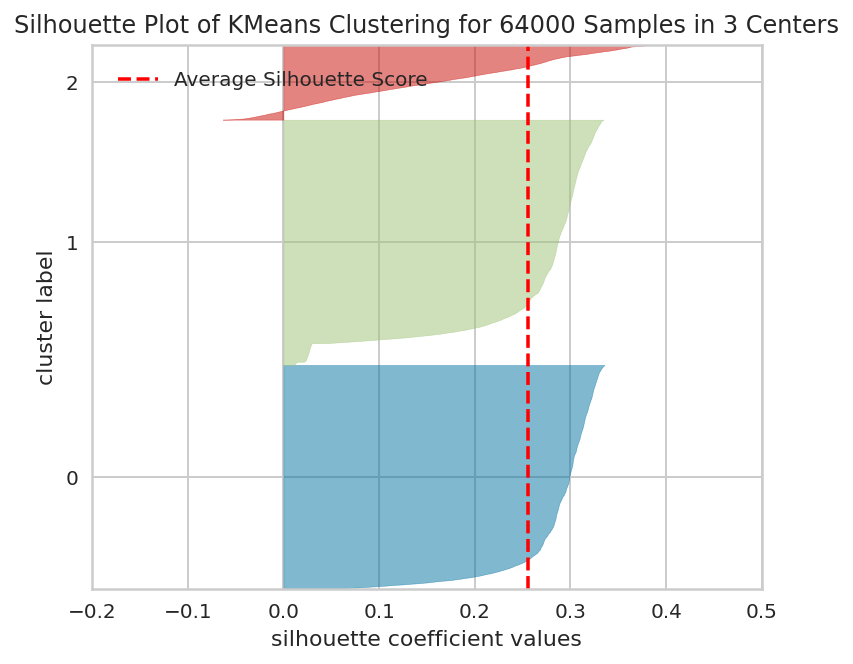

In [20]:
fig, ax = plt.subplots(figsize=(6,5))
ax = silhouette_visualizer(kmeans['clf'], kmeans_pipeline['preprocessor'].transform(df_segm), colors='yellowbrick')
plt.show()

In [21]:
#kmeans['clf'].labels_

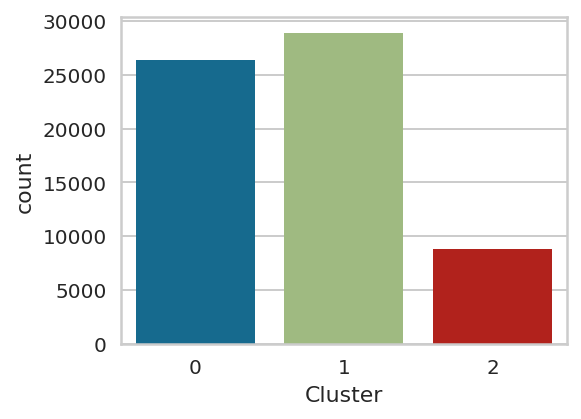

In [22]:
fig, ax = plt.subplots(figsize=(4,3))
ax = sns.countplot(pd.Series(kmeans['clf'].labels_))
ax.set_xlabel('Cluster')
plt.show()

In [23]:
df_segm

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,cluster
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,1
1,6,329.08,1,1,Rural,1,Web,No Offer,2
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,2
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,1
5,6,134.83,0,1,Surburban,0,Phone,Buy One Get One,0
6,9,280.20,1,0,Surburban,1,Phone,Buy One Get One,1
7,9,46.42,0,1,Urban,0,Phone,Buy One Get One,0
8,9,675.07,1,1,Rural,1,Phone,Discount,2
9,10,32.84,0,1,Urban,1,Web,Buy One Get One,0


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


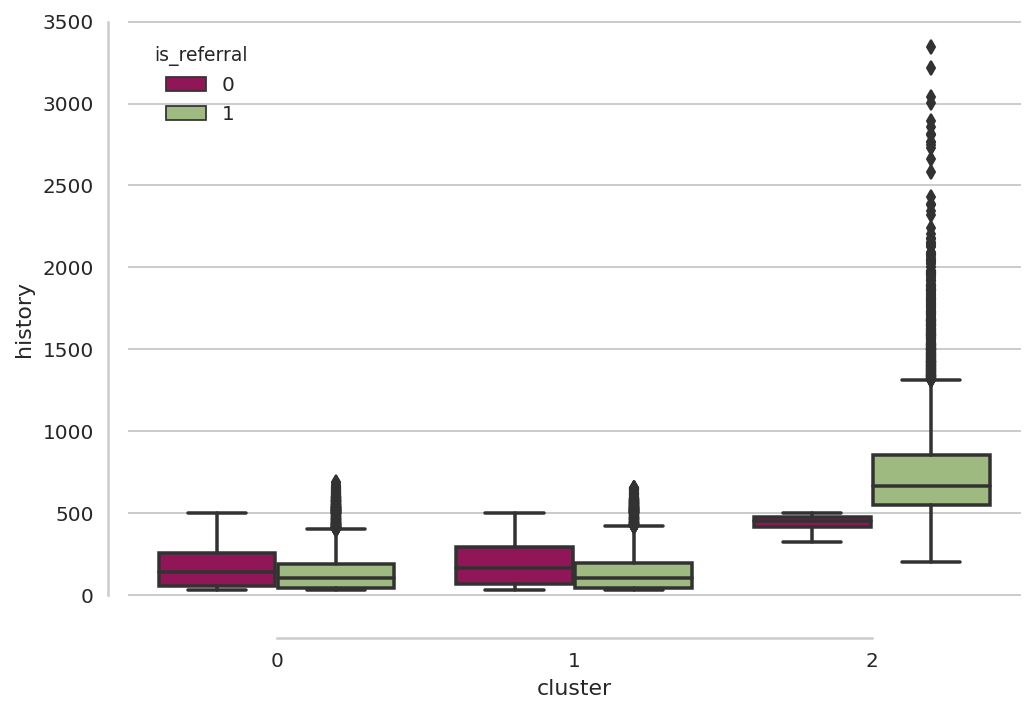

In [24]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x="cluster", y="history",
            hue="is_referral", palette=["m", "g"],
            data=df_segm)
sns.despine(offset=10, trim=True)
plt.show()

#### Writing Segments to Datawarehouse

In [25]:
spark = SparkSession\
    .builder\
    .appName("Segments")\
    .config("spark.hadoop.fs.s3a.s3guard.ddb.region","us-east-1")\
    .config("spark.yarn.access.hadoopFileSystems","s3a://demo-aws-2/")\
    .getOrCreate()

NameError: name 'SparkSession' is not defined

In [ ]:
spark_df = spark.createDataFrame(df_segm)

In [ ]:
spark_df\
  .write.format("parquet")\
  .mode("overwrite")\
  .saveAsTable(
    'default.customer_segments'
)